In [104]:
import pandas as pd
import matplotlib.pyplot as plt
# Figure : 그림이 그려지는 캔버스나 종이를 뜻함
# Axes  : 하나의 플롯
# Axis  : 가로축이나 세로축 등의 축

# twinx() 2축 그래프 그리기
# ax.plot() 같은 화면에 그래프 추가

In [3]:
df = pd.read_excel('dataset/시도별 전출입 인구수.xlsx')

# NaN 이 존재, 이전 자료의 값으로 대체
df = df.fillna(method='ffill')
print(df.head())

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2    전국  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3    전국  부산광역시    448577    389797    362202    482061    680984    805979   
4    전국  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

In [4]:
# 전출지가 '서울특별시'인 자료만 검색
mask = ((df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시'))
df_seoul = df[mask]

# 전출지별 컬럼 삭제
df_seoul = df_seoul.drop(columns='전출지별',axis=1)

# 전입지별 -> 전입지로 변경
df_seoul.rename(columns={'전입지별':'전입지'},inplace=True)
df_seoul.set_index('전입지',inplace=True)

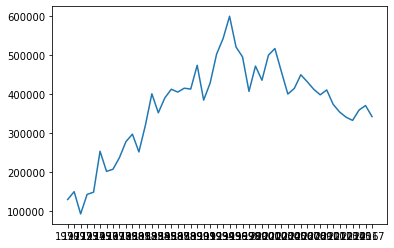

In [7]:
# 경기도로 전입한 인구수의 변호도를 그래프로 표현
sr_one = df_seoul.loc['경기도']
plt.plot(sr_one)
# plt.plot(sr_one.index, sr_one.values) #plt.plot(x축, y축)

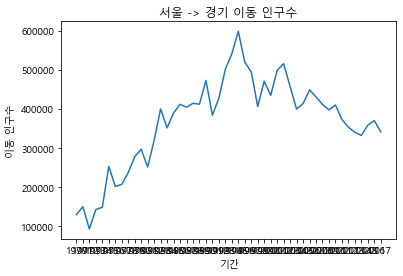

In [17]:
plt.plot(sr_one)

# 차트 제목 추가
plt.title('서울 -> 경기 이동 인구수')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

In [14]:
from matplotlib import rc

rc('font', family='Malgun Gothic')

# plt.rcParams['axes.unicode_minus'] = False

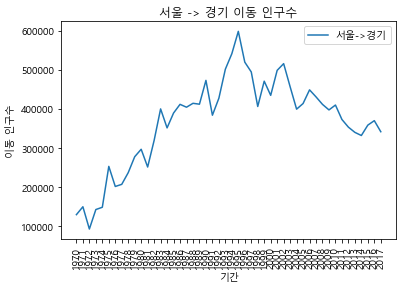

In [19]:
# 그래프에 관련된 설정은 같은 cell에 있어야 함
plt.plot(sr_one)

# 차트 제목 추가
plt.title('서울 -> 경기 이동 인구수')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# legend 그래프에 대한 설명
# 그래프 선 설명 추가
plt.legend(labels=['서울->경기'],loc='best')

# xlabel 설정
plt.xticks(size=10, rotation='vertical')
#rotation = 정수 - 반시계방향 각도

plt.show()

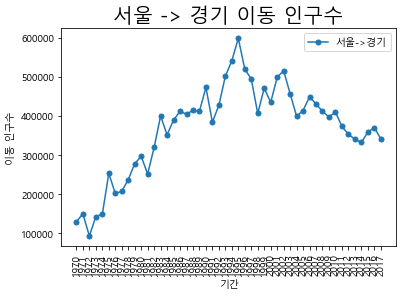

In [22]:
# 마커추가
plt.plot(sr_one,marker='o',markersize=5)

# 차트 제목 추가
plt.title('서울 -> 경기 이동 인구수',size=20)

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# legend 그래프에 대한 설명
# 그래프 선 설명 추가
plt.legend(labels=['서울->경기'],loc='best')

# xlabel 설정
plt.xticks(size=10, rotation='vertical')
#rotation = 정수 - 반시계방향 각도

plt.show()

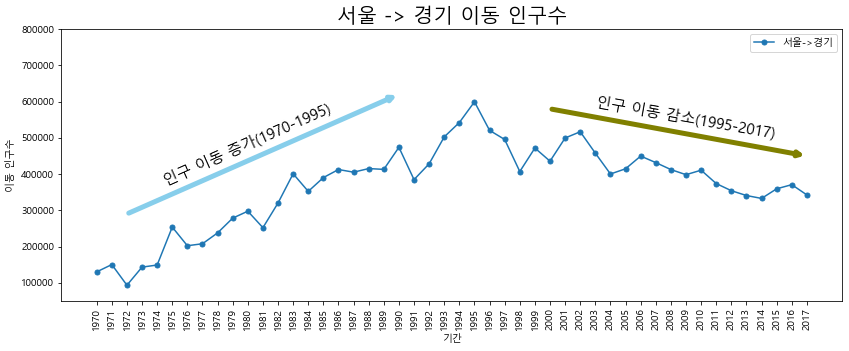

In [32]:
# 그림 사이즈 지정
plt.figure(figsize=(14,5)) # inch

# 그래프 주석 표시
# 마커추가
plt.plot(sr_one,marker='o',markersize=5)

# 차트 제목 추가
plt.title('서울 -> 경기 이동 인구수',size=20)

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# legend 그래프에 대한 설명
# 그래프 선 설명 추가
plt.legend(labels=['서울->경기'],loc='best')

# xlabel 설정
#rotation = 정수 - 반시계방향 각도
plt.xticks(size=10, rotation='vertical')

# y출 범위 지정
plt.ylim(50000,800000)

# 주석 표시 -화살표
plt.annotate('',
            xy=(20,620000),
             xytext=(2,290000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->',
                             color='skyblue',
                             lw=5
                            )
            )
plt.annotate('',
            xy=(47,450000),
             xytext=(30,580000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->',
                             color='olive',
                             lw=5)
            )

# 주석표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',
            xy=(10,370000),
            rotation=24,
            va='baseline',
            ha='center',
            fontsize=15,
            )
plt.annotate('인구 이동 감소(1995-2017)',
            xy=(39,500000),
            rotation=-10,
            va='baseline',
            ha='center',
            fontsize=15,
            )
plt.show()

C:\Users\Mu-jun\AppData\Local\Temp/ipykernel_4192/1726703604.py:21: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  ax1.set_xticklabels(sr_one.index,dict(rotation=75))
C:\Users\Mu-jun\AppData\Local\Temp/ipykernel_4192/1726703604.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index,dict(rotation=75))
C:\Users\Mu-jun\AppData\Local\Temp/ipykernel_4192/1726703604.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=45)


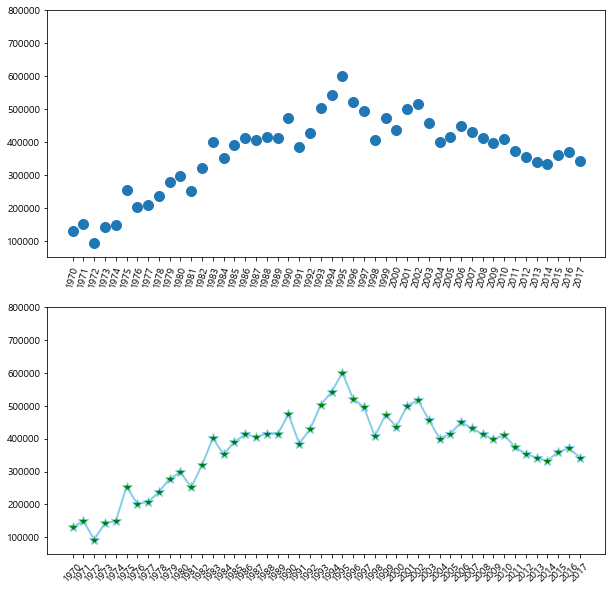

In [39]:
# 한 페이지에 두 개의 그래프를 그림, 두 개의 행으로
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# axe 각 객체에 대한 plot 정의
ax1.plot(sr_one,'o',markersize=10)
ax2.plot(sr_one,
         marker='*',
         markerfacecolor='green',
         markersize=10, color='skyblue',
         linewidth=2,
         label='서울->경기'
        )
# y축 범위설정
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

# x축 눈금 라벨 지정 75
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=45)

plt.show()

In [49]:
# 하나의 페이지에 여러 개의 그래프를 그림

# 서울특별시에서 충청남도, 경상북도, 강원도로 이전한 인구수의 분포도
col_years = list(map(str,range(1980,2016)))
print(col_years) 

df_two = df_seoul.loc[['충청남도','경상북도','강원도'],col_years]
print(df_two.columns)               

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')


C:\Users\Mu-jun\AppData\Local\Temp/ipykernel_4192/876763405.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years,rotation='vertical')


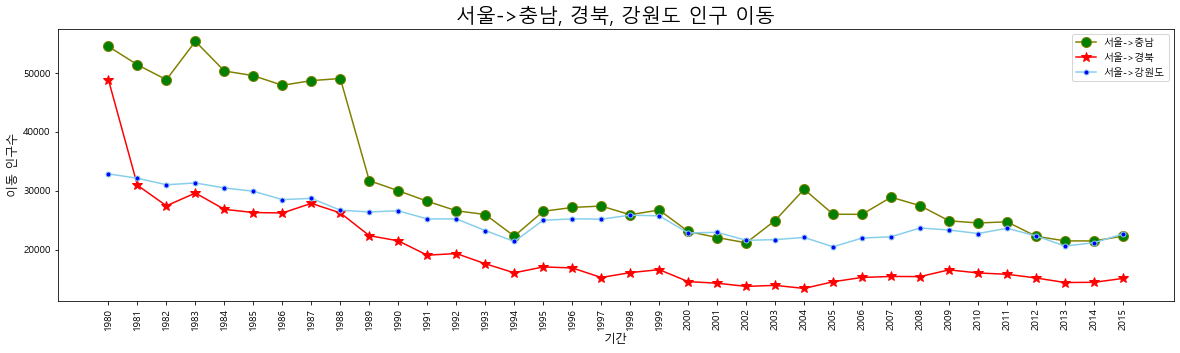

In [50]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# ax에 그래프 추가
ax.plot(col_years,
        df_two.loc['충청남도'],
        marker='o',
        markerfacecolor='green',
        markersize=10,
        color='olive',
        label='서울->충남'
       )
ax.plot(col_years,
        df_two.loc['경상북도'],
        marker='*',
        markerfacecolor='red',
        markersize=10,
        color='red',
        label='서울->경북'
       )
ax.plot(col_years,
        df_two.loc['강원도'],
        marker='.',
        markerfacecolor='blue',
        markersize=10,
        color='skyblue',
        label='서울->강원도'
       )
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울->충남, 경북, 강원도 인구 이동',size=20)

# 축 이름 추가
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years,rotation='vertical')

plt.show()

In [51]:
# df_two 에 전라남도 데이터 추가
df_two.loc['전라남도'] = df_seoul.loc['전라남도',col_years]
df_two.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,54480,51369,48834,55344,50318,49520,47888,48678,49038,31707,...,25986,28898,27458,24889,24522,24723,22269,21486,21473,22299
경상북도,48839,30928,27440,29601,26842,26297,26221,27844,26235,22374,...,15285,15448,15425,16569,16042,15818,15191,14420,14456,15113
강원도,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,...,21969,22177,23668,23331,22736,23624,22332,20601,21173,22659
전라남도,56251,57645,55408,57737,52779,52629,41082,42667,40695,36188,...,17329,17717,16601,17468,16429,15974,14765,14187,14591,14598


C:\Users\Mu-jun\AppData\Local\Temp/ipykernel_4192/3353350839.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years,rotation='vertical')


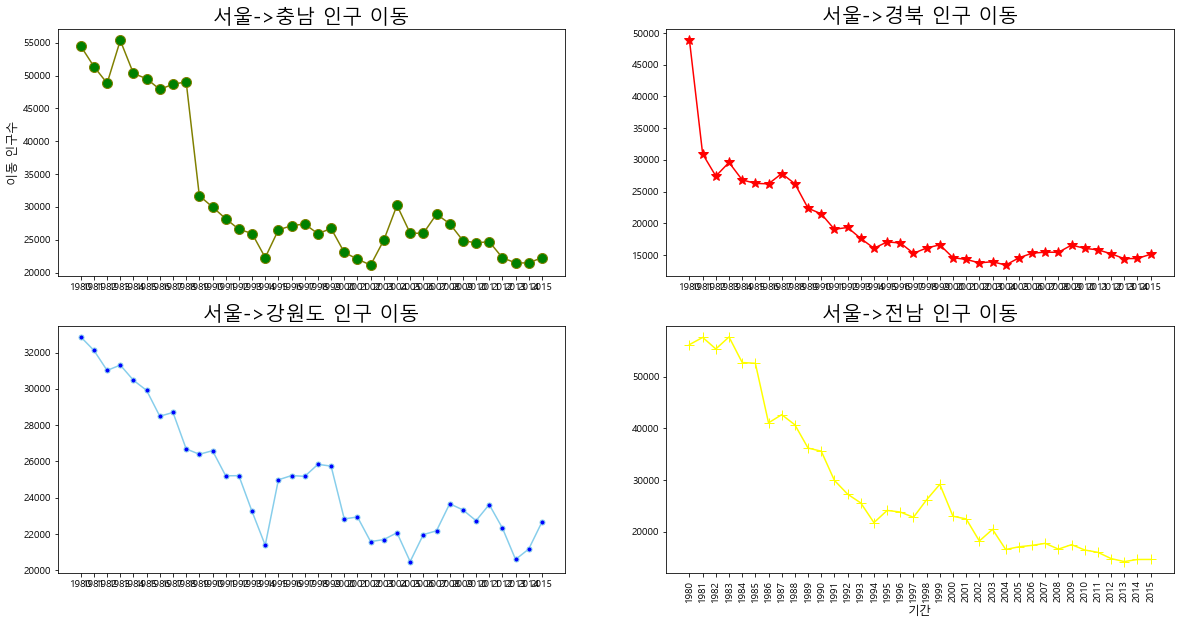

In [53]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# ax에 그래프 추가
ax1.plot(col_years,
        df_two.loc['충청남도'],
        marker='o',
        markerfacecolor='green',
        markersize=10,
        color='olive',
        label='서울->충남'
       )
ax2.plot(col_years,
        df_two.loc['경상북도'],
        marker='*',
        markerfacecolor='red',
        markersize=10,
        color='red',
        label='서울->경북'
       )
ax3.plot(col_years,
        df_two.loc['강원도'],
        marker='.',
        markerfacecolor='blue',
        markersize=10,
        color='skyblue',
        label='서울->강원도'
       )
ax4.plot(col_years,
        df_two.loc['전라남도'],
        marker='+',
        markerfacecolor='yellow',
        markersize=10,
        color='yellow',
        label='서울->전남'
       )

# 차트 제목 추가
ax1.set_title('서울->충남 인구 이동',size=20)
ax2.set_title('서울->경북 인구 이동',size=20)
ax3.set_title('서울->강원도 인구 이동',size=20)
ax4.set_title('서울->전남 인구 이동',size=20)

# 축 이름 추가
ax4.set_xlabel('기간',size=12)
ax1.set_ylabel('이동 인구수',size=12)

# 축 눈금 라벨 지정 및 90도 회전
ax4.set_xticklabels(col_years,rotation='vertical')

plt.show()

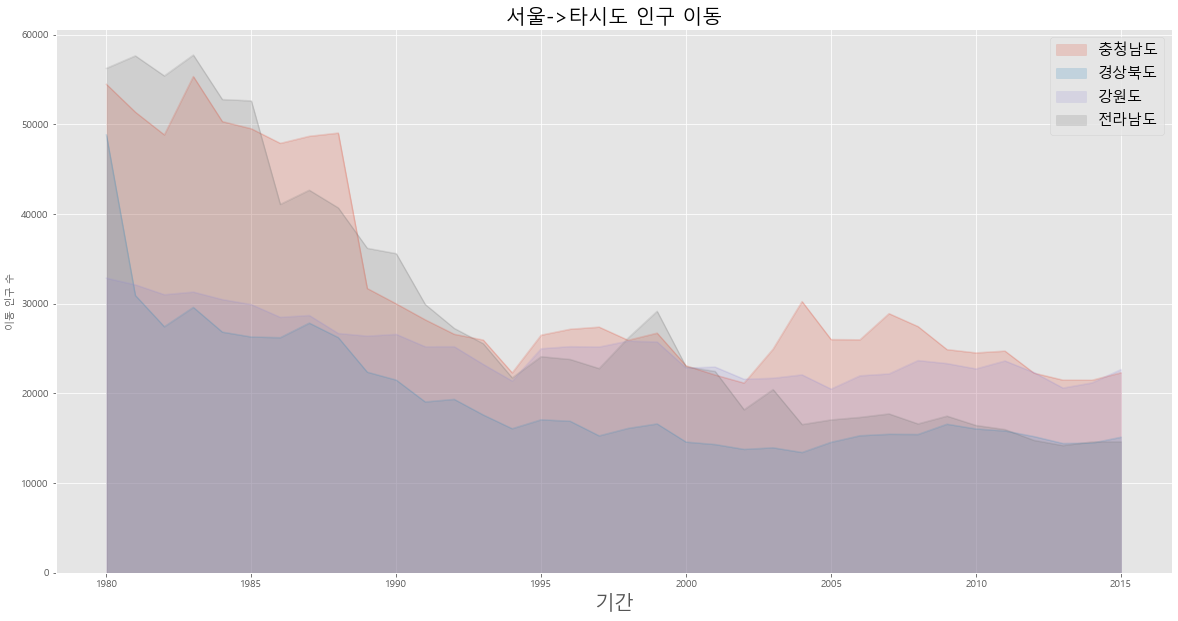

In [63]:
df_3 = df_two.T
df_3.index = map(int,df_3.index)
df_3.index

# 면적 그래프
plt.style.use('ggplot')

# pandas의 plot
df_3.plot(kind='area',
          stacked=False, # 누적해서 쌓으려면 True - 기본값
          alpha=0.2, # 투명도 기본값은 0.5
          figsize=(20,10)
         )

# matplotlib으로 figure설정
plt.title('서울->타시도 인구 이동',size=20)
plt.ylabel('이동 인구 수',size=10)
plt.xlabel('기간',size=20)
plt.legend(fontsize=15)

plt.show()

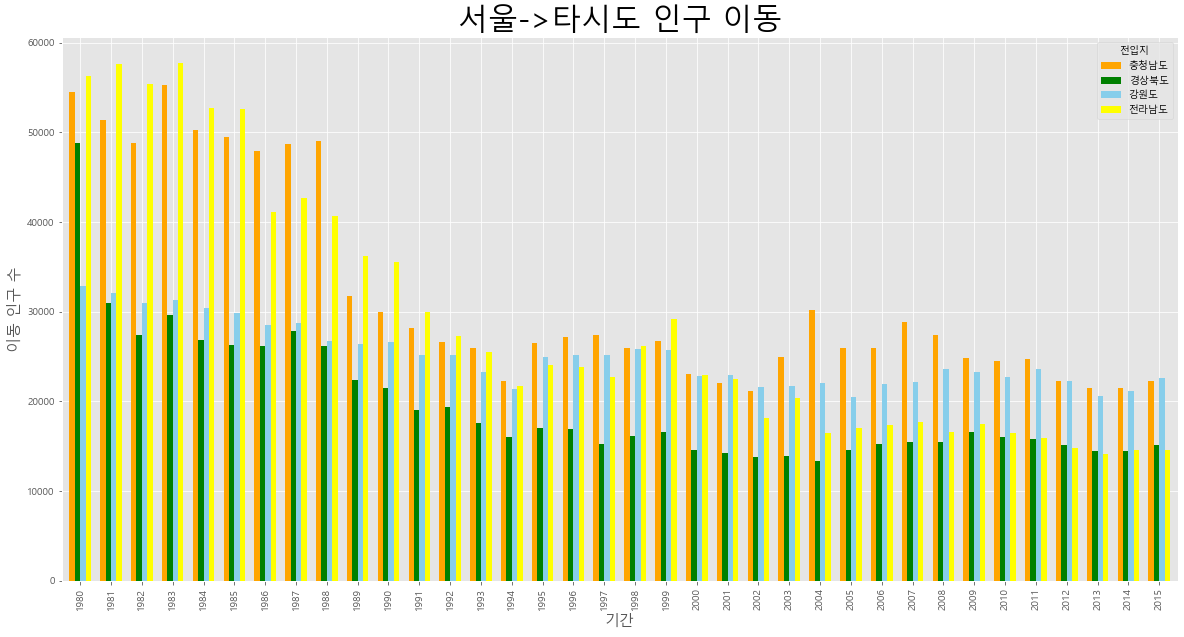

In [64]:
# 막대 그래프
plt.style.use('ggplot')

df_3.plot(kind='bar', figsize=(20,10), width=0.7,
         color=['orange','green','skyblue','yellow'])

plt.title('서울->타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수',size=15)
plt.xlabel('기간',size=15)

plt.show()

In [66]:
#2010~2017
col_years = list(map(str,range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상남도','강원도','전라남도'],col_years]
df_4

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상남도,15689,16039,14474,14447,14799,15220,13717,12692
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [67]:
# 합계
df_4['합계'] = df_4.sum(axis=1)
df_4

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533.0
경상남도,15689,16039,14474,14447,14799,15220,13717,12692,117077.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035.0


In [69]:
# 수평 막대그래프, 도시별 인구 이동수의 합계를 그래프로 표현
df_total = df_4[['합계']].sort_values(by='합계')
df_total

,합계
전입지,
전라남도,116035.0
경상남도,117077.0
강원도,175731.0
충청남도,179533.0


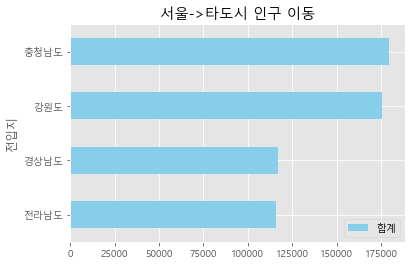

In [71]:
df_total.plot(kind='barh',color='skyblue',width=0.5)
plt.title('서울->타도시 인구 이동')

plt.show()

In [87]:
# 2축 그래프 그리기 : 데이터 전처리
df = pd.read_excel('./dataset/남북한발전전력량.xlsx')

df_north = df.loc[5:]
df_north.drop('전력량 (억㎾h)',axis=1,inplace=True)
df_north.set_index('발전 전력별',inplace=True)
df_north = df_north.T
df_north = df_north.rename(columns={'합계':'총발전량'})
df_north['총발전량-1년'] = df_north['총발전량'].shift(1)
df_north['증감율'] = ((df_north['총발전량']/df_north['총발전량-1년'])-1)*100
df_north

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


발전 전력별,총발전량,수력,화력,원자력,총발전량-1년,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


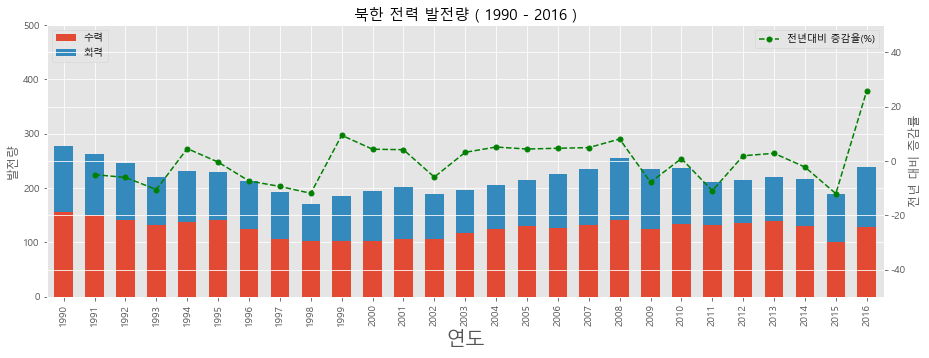

In [112]:
# 2축을 가진 그래프 그리기
ax1 = df_north[['수력','화력']].plot(kind='bar',
                                 stacked=True,
                                 figsize=(15,5),
                                 width=0.6
                                )
ax2 = ax1.twinx()
ax2.plot(df_north.index,
           df_north['증감율'], 
           ls='--',
           marker='o',
           markersize=5,
           color='green',
           label='전년대비 증감율(%)'
          )
ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도',size=20)
ax1.set_ylabel('발전량')
ax2.set_ylabel('전년 대비 증감률')
plt.title('북한 전력 발전량 ( 1990 - 2016 )',size=15)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

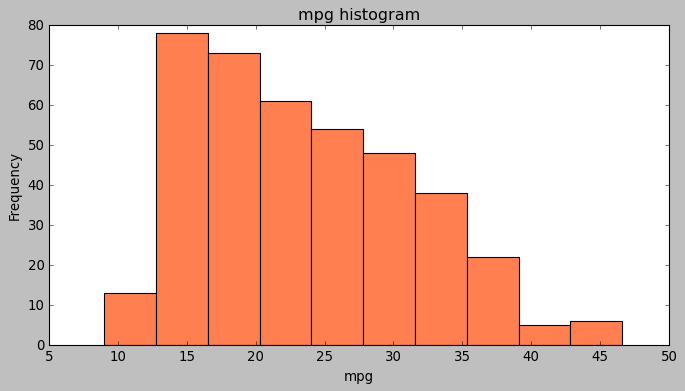

In [179]:
# pandas 히스토그램 : 단변수 데이터의 빈도수 표시
df = pd.read_csv('./dataset/auto-mpg.csv',header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
             'acceleration','model year','origin','name']

# 연비 'mpg' 에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist',bins=10,color='coral',figsize=(10,5))

plt.style.use('classic')
plt.title('mpg histogram')
plt.xlabel('mpg')
plt.show()

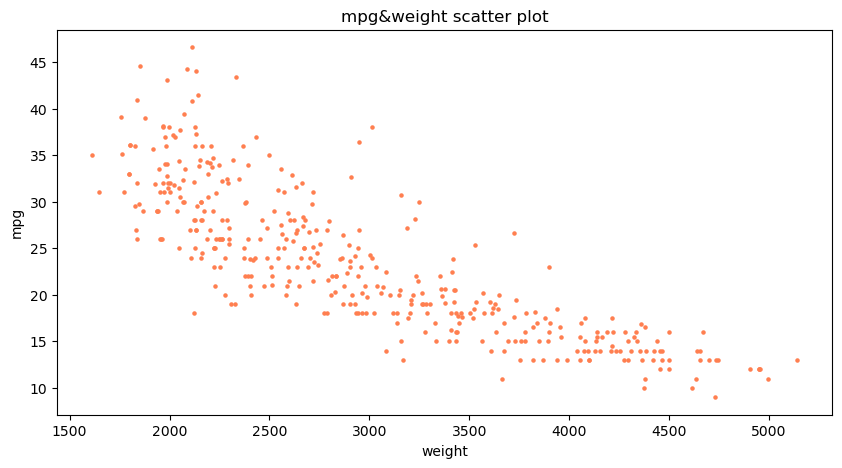

In [184]:
# pandas 산점도 scatter plot
plt.style.use('default')

# 연비'mpg'와 차중'weight' 에 대한 산점도 그리기
df.plot(kind='scatter',x='weight',y='mpg',c='coral',s=5,figsize=(10,5))

plt.title('mpg&weight scatter plot')
plt.show()

In [180]:
# seaborn 을 확용한 고급 그래프 작성하기
import seaborn as sns

In [109]:
titanic = sns.load_dataset('titanic')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


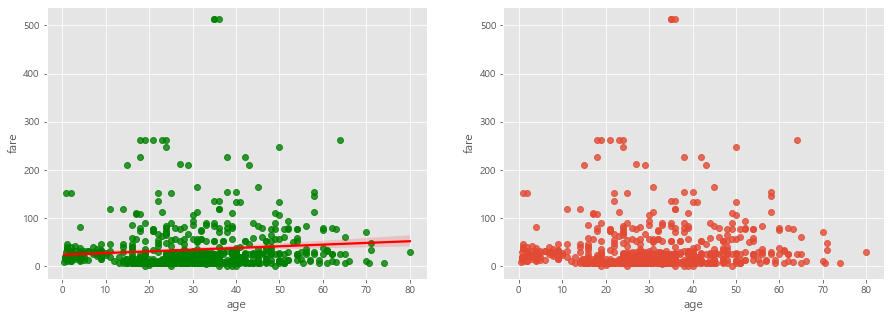

In [115]:
# age, fare 컬럼간의 관계 -> 회귀선
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1) # 회귀선 보이기
ax2 = fig.add_subplot(1,2,2) # 회귀선 없이 그리기

# 그래프 그리기 - 선형회귀선 표시 ( fit_reg = True 기본값)
sns.regplot(x='age',
            y='fare',
            data=titanic,
            ax=ax1,
            color='green',
            line_kws={'color': 'red'}
           )
sns.regplot(x='age',
            y='fare',
            data=titanic,
            ax=ax2, 
            fit_reg=False
           )

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


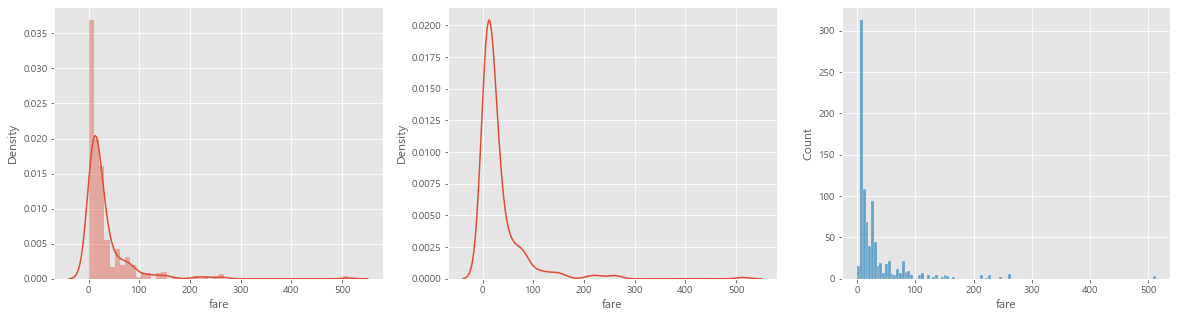

In [172]:
# 커널 밀도 함수 : 데이터가 집중된 분포, hisit, kde
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,1)
# ax11 = ax1.twinx()
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본 값
sns.distplot(titanic['fare'],ax=ax1)
# sns.kdeplot(titanic['fare'],ax=ax1,label='kde')
# sns.histplot(titanic['fare'],ax=ax11,label='hist')

# hist : False
# sns.distplot(titanic['fare'],ax=ax2,hist=False)
sns.kdeplot(titanic['fare'],ax=ax2)

# kde : False
# sns.distplot(titanic['fare'],ax=ax3,kde=False)
sns.histplot(titanic['fare'],ax=ax3)

# ax1.set_ylim(0,0.03)
# ax11.set_ylim(0,400)
# ax1.legend(loc='upper left')
# ax11.legend(loc='best')
plt.show()

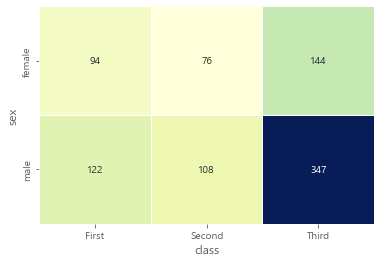

In [127]:
##### heatmap : 색깔로 두 변수의 관계성을 보여주는 그래프
table = titanic.pivot_table(index=['sex'],
                            columns=['class'],
                            aggfunc='size' # 그룹 함수
                           )

sns.heatmap( table,
            annot=True, # 데이터값 표시여부
            fmt='d', # 정수형 포맷
            cmap='YlGnBu', # 컬러 맵 (잘못된 값을 넣으면 보기를 볼 수 있다.)
            linewidth=.5, # 구분 선
            cbar=False # 컬러 바 표시 여부
           )

plt.show()

category


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarm Plot')

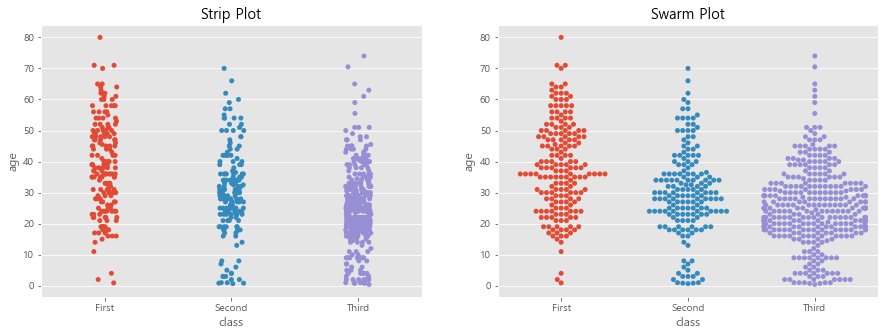

In [129]:
# 범주형 데이터(category)의 산점도
print(titanic['class'].dtype)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포 : 데이터 분산 고려 않음
sns.stripplot(x='class',y='age',data=titanic,ax=ax1)

# 이산형 변수의 분포 : 데이터 분산 고려
sns.swarmplot(x='class',y='age',data=titanic,ax=ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

In [ ]:
# !pip install folium

In [136]:
# 지도를 활용 : Folium 라이브러리
import folium

In [140]:
# 서울의 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98],zoom_start=12)

# 파일로 저장
seoul_map.save('./dataset/seoul.html')

In [141]:
# 지도 스타일 적용하기
seoul_map2 = folium.Map(location=[37.55,126.98],zoom_start=12,
                        tiles='Stamen Terrain')
seoul_map3 = folium.Map(location=[37.55,126.98],zoom_start=12,
                        tiles='Stamen Toner')

seoul_map2.save('./dataset/seoul2.html')
seoul_map3.save('./dataset/seoul3.html')

In [145]:
# 지도에 마커 표시하기
# 위도 경도의 자료가 있는 데이터를 load
df = pd.read_excel('./dataset/서울지역 대학교 위치.xlsx',index_col=0)

seoul_map = folium.Map(location=[37.55,126.98],zoom_start=12,
                        tiles='Stamen Terrain')

df.head()

,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [148]:
for name, lat,lng in zip(df.index,df.위도,df.경도):
#     print(name, lat, lng)
    folium.Marker([lat,lng],popup=name).add_to(seoul_map)

seoul_map.save('./dataset/seoul_colleges.html')